# Flaky Label Prediction - Statistical Analysis

This notebook analyzes the inference results from the flaky label prediction model.

**Analysis includes:**
- Overall accuracy
- Per-category precision, recall, and F1 score
- Confusion matrix
- Visualizations

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report,
    confusion_matrix
)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Load the inference results
# Change path here if needed
csv_path = r'G:\Flaky Tests\SPL-3\flaky-label-prediction\inference_results.csv'

df = pd.read_csv(csv_path)

print(f"Loaded {len(df)} test results")
print(f"\nFirst few rows:")
df.head()

Loaded 878 test results

First few rows:


,test_file_name,actual_label,predicted_label
0,v1_Achilles.TestEntityWithStaticAnnotations.sh...,async wait,async wait
1,v1_activemq.BrokerTest.testConsumerClose@Async...,async wait,async wait
2,v1_activemq.DurableConsumerTest.testConcurrent...,async wait,concurrency
3,v1_activemq.ExpiredMessagesTest.testRecoverExp...,async wait,async wait
4,v1_activemq.InactivityMonitorTest.testClientHa...,async wait,concurrency


In [3]:
# Data overview
print("Dataset Info:")
print(f"Total samples: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nActual label distribution:")
print(df['actual_label'].value_counts())
print(f"\nPredicted label distribution:")
print(df['predicted_label'].value_counts())

Dataset Info:
Total samples: 878

Columns: ['test_file_name', 'actual_label', 'predicted_label']

Actual label distribution:
actual_label
async wait                   251
test order dependency        188
time                         108
unordered collections        102
concurrency                   96
network                       62
randomness                    33
resource leak                 18
floating point operations      6
too restrictive range          6
i_o                            4
platform dependency            4
Name: count, dtype: int64

Predicted label distribution:
predicted_label
async wait               264
test order dependency    218
concurrency              170
time                     126
unordered collections    100
Name: count, dtype: int64


## 2. Overall Accuracy

In [4]:
# Calculate overall accuracy
y_true = df['actual_label']
y_pred = df['predicted_label']

accuracy = accuracy_score(y_true, y_pred)

print("="*70)
print("OVERALL ACCURACY")
print("="*70)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Correct predictions: {(y_true == y_pred).sum()} / {len(df)}")
print("="*70)

OVERALL ACCURACY
Accuracy: 0.6856 (68.56%)
Correct predictions: 602 / 878


## 3. Per-Category Metrics

In [5]:
# Get unique labels
labels = sorted(df['actual_label'].unique())

# Calculate metrics per category
precision_per_class = precision_score(y_true, y_pred, labels=labels, average=None, zero_division=0)
recall_per_class = recall_score(y_true, y_pred, labels=labels, average=None, zero_division=0)
f1_per_class = f1_score(y_true, y_pred, labels=labels, average=None, zero_division=0)

# Create metrics dataframe
metrics_df = pd.DataFrame({
    'Category': labels,
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1 Score': f1_per_class
})

# Add support (number of samples per category)
support = df['actual_label'].value_counts().reindex(labels, fill_value=0)
metrics_df['Support'] = support.values

print("\nPer-Category Metrics:")
print("="*70)
print(metrics_df.to_string(index=False))
print("="*70)

# Calculate weighted averages
precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print(f"\nWeighted Averages:")
print(f"  Precision: {precision_weighted:.4f}")
print(f"  Recall:    {recall_weighted:.4f}")
print(f"  F1 Score:  {f1_weighted:.4f}")


Per-Category Metrics:
                 Category  Precision   Recall  F1 Score  Support
               async wait   0.712121 0.749004  0.730097      251
              concurrency   0.452941 0.802083  0.578947       96
floating point operations   0.000000 0.000000  0.000000        6
                      i_o   0.000000 0.000000  0.000000        4
                  network   0.000000 0.000000  0.000000       62
      platform dependency   0.000000 0.000000  0.000000        4
               randomness   0.000000 0.000000  0.000000       33
            resource leak   0.000000 0.000000  0.000000       18
    test order dependency   0.802752 0.930851  0.862069      188
                     time   0.555556 0.648148  0.598291      108
    too restrictive range   0.000000 0.000000  0.000000        6
    unordered collections   0.920000 0.901961  0.910891      102

Weighted Averages:
  Precision: 0.6002
  Recall:    0.6856
  F1 Score:  0.6360


In [6]:
# Classification report
print("\nDetailed Classification Report:")
print("="*70)
print(classification_report(y_true, y_pred, labels=labels, zero_division=0))


Detailed Classification Report:
                           precision    recall  f1-score   support

               async wait       0.71      0.75      0.73       251
              concurrency       0.45      0.80      0.58        96
floating point operations       0.00      0.00      0.00         6
                      i_o       0.00      0.00      0.00         4
                  network       0.00      0.00      0.00        62
      platform dependency       0.00      0.00      0.00         4
               randomness       0.00      0.00      0.00        33
            resource leak       0.00      0.00      0.00        18
    test order dependency       0.80      0.93      0.86       188
                     time       0.56      0.65      0.60       108
    too restrictive range       0.00      0.00      0.00         6
    unordered collections       0.92      0.90      0.91       102

                 accuracy                           0.69       878
                macro avg  

## 4. Confusion Matrix

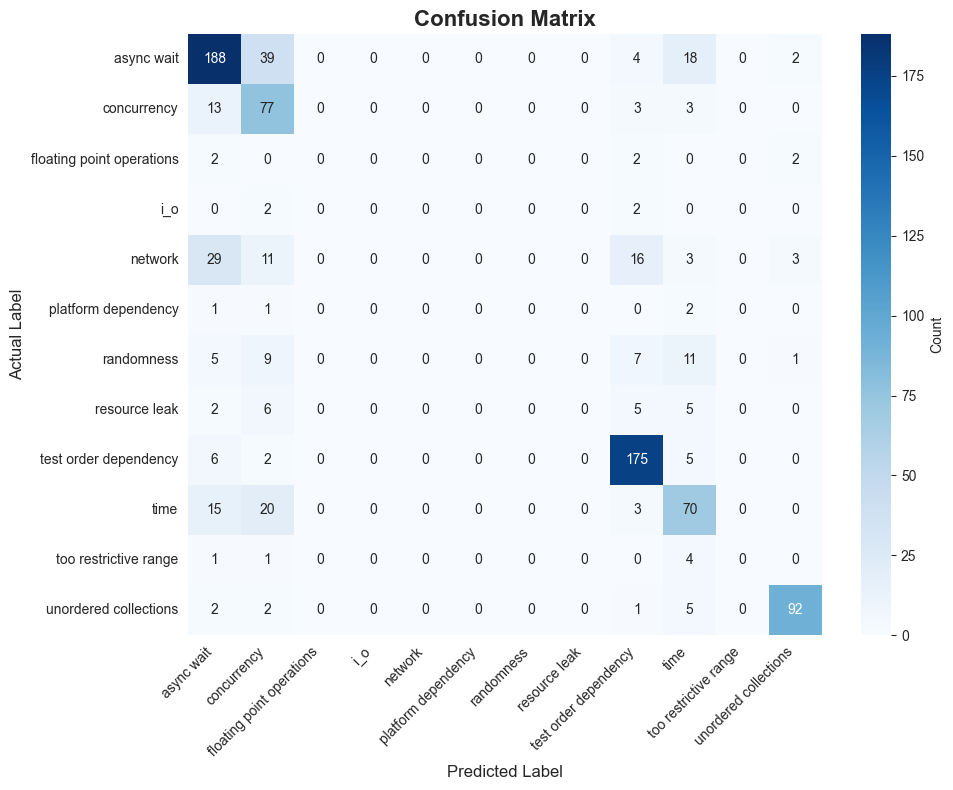

Confusion matrix saved as 'confusion_matrix.png'


In [7]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Confusion matrix saved as 'confusion_matrix.png'")

## 5. Visualization: Precision by Category

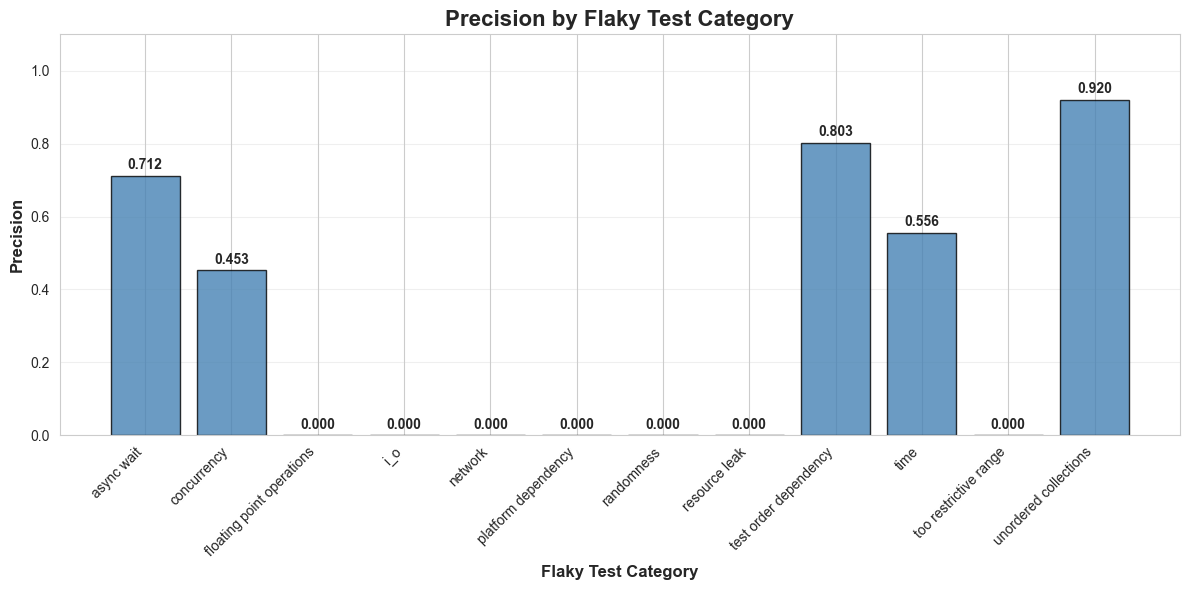

Precision graph saved as 'precision_by_category.png'


In [8]:
# Graph 1: Precision by Category
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(range(len(labels)), precision_per_class, 
               color='steelblue', alpha=0.8, edgecolor='black')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, precision_per_class)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Flaky Test Category', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('Precision by Flaky Test Category', fontsize=16, fontweight='bold')
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('precision_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("Precision graph saved as 'precision_by_category.png'")

## 6. Visualization: Recall by Category

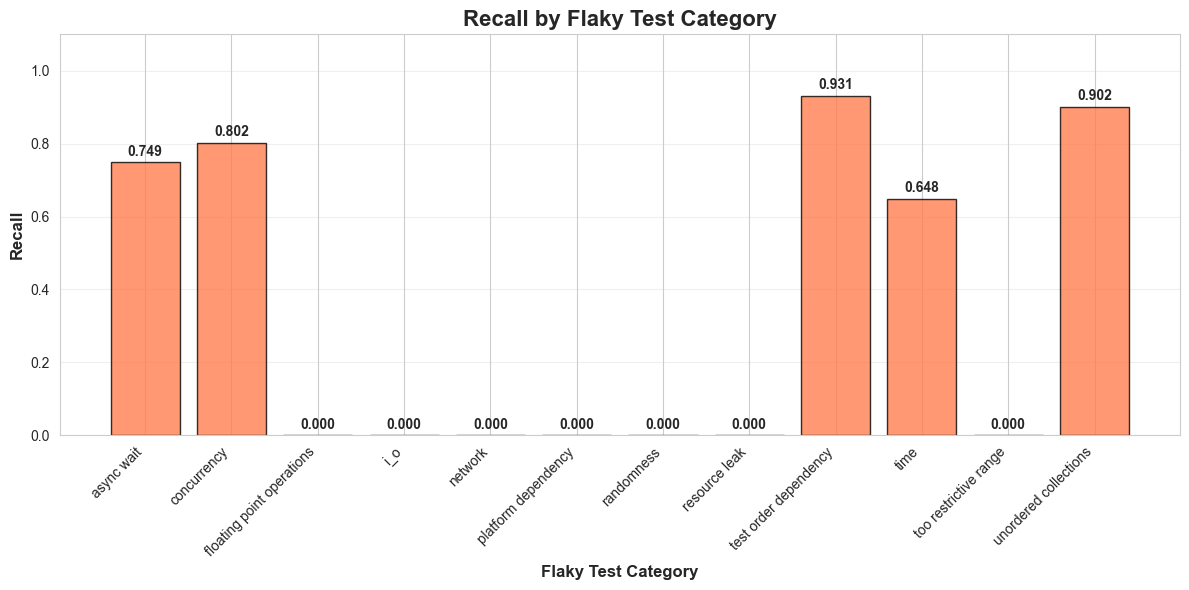

Recall graph saved as 'recall_by_category.png'


In [9]:
# Graph 2: Recall by Category
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(range(len(labels)), recall_per_class, 
               color='coral', alpha=0.8, edgecolor='black')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, recall_per_class)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Flaky Test Category', fontsize=12, fontweight='bold')
plt.ylabel('Recall', fontsize=12, fontweight='bold')
plt.title('Recall by Flaky Test Category', fontsize=16, fontweight='bold')
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('recall_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("Recall graph saved as 'recall_by_category.png'")

## 7. Visualization: F1 Score by Category

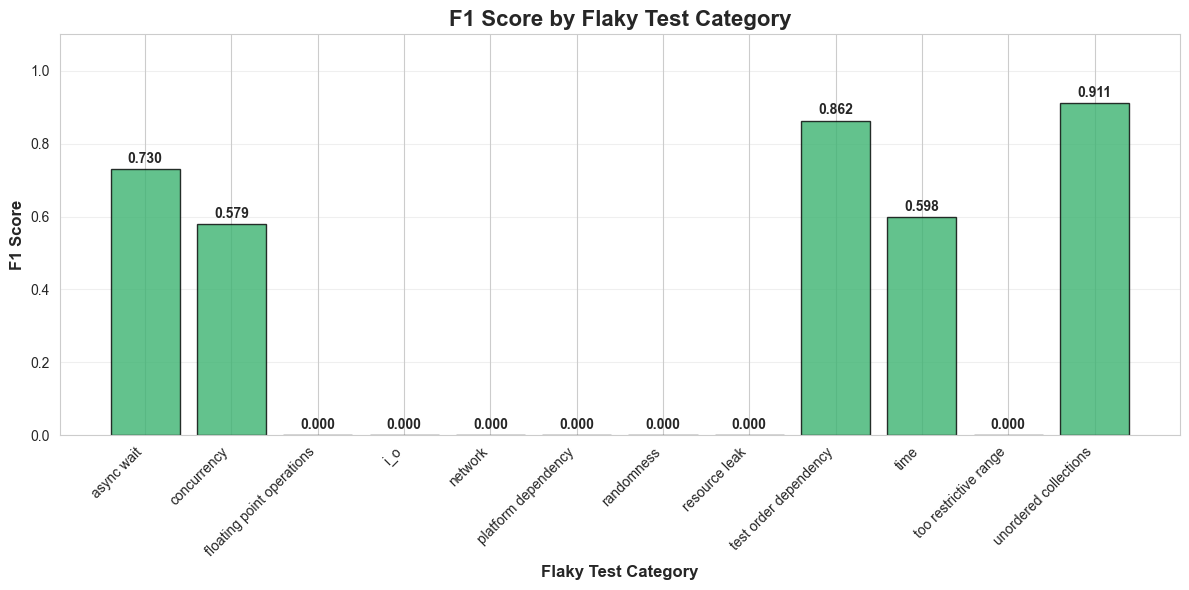

F1 Score graph saved as 'f1_score_by_category.png'


In [10]:
# Graph 3: F1 Score by Category
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(range(len(labels)), f1_per_class, 
               color='mediumseagreen', alpha=0.8, edgecolor='black')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, f1_per_class)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Flaky Test Category', fontsize=12, fontweight='bold')
plt.ylabel('F1 Score', fontsize=12, fontweight='bold')
plt.title('F1 Score by Flaky Test Category', fontsize=16, fontweight='bold')
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('f1_score_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("F1 Score graph saved as 'f1_score_by_category.png'")

## 8. Combined Metrics Comparison

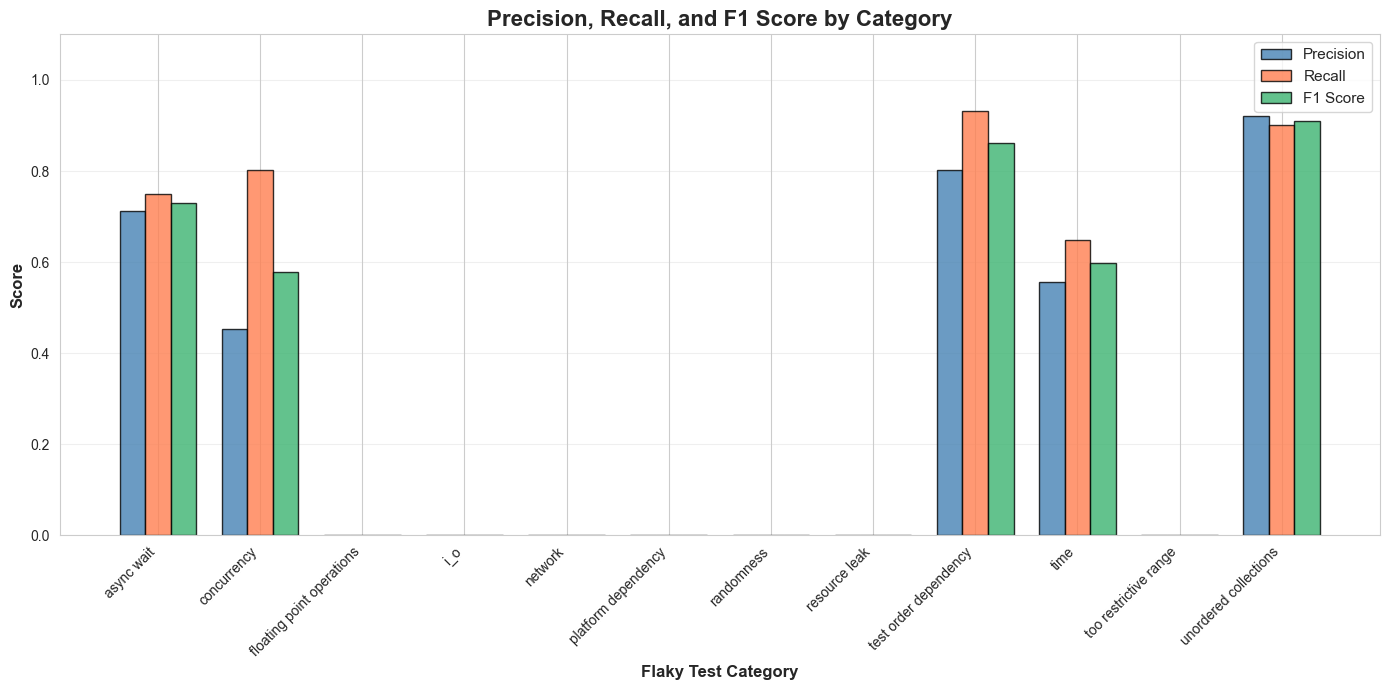

Combined metrics graph saved as 'combined_metrics_comparison.png'


In [11]:
# Bonus: Combined comparison of all metrics
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(labels))
width = 0.25

bars1 = ax.bar(x - width, precision_per_class, width, label='Precision', 
               color='steelblue', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x, recall_per_class, width, label='Recall', 
               color='coral', alpha=0.8, edgecolor='black')
bars3 = ax.bar(x + width, f1_per_class, width, label='F1 Score', 
               color='mediumseagreen', alpha=0.8, edgecolor='black')

ax.set_xlabel('Flaky Test Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Precision, Recall, and F1 Score by Category', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('combined_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Combined metrics graph saved as 'combined_metrics_comparison.png'")

## 9. Summary Statistics

In [12]:
# Summary statistics
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)

print(f"\nOverall Performance:")
print(f"  Accuracy:           {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Weighted Precision: {precision_weighted:.4f}")
print(f"  Weighted Recall:    {recall_weighted:.4f}")
print(f"  Weighted F1 Score:  {f1_weighted:.4f}")

print(f"\nBest Performing Category (by F1 Score):")
best_idx = np.argmax(f1_per_class)
print(f"  Category: {labels[best_idx]}")
print(f"  Precision: {precision_per_class[best_idx]:.4f}")
print(f"  Recall:    {recall_per_class[best_idx]:.4f}")
print(f"  F1 Score:  {f1_per_class[best_idx]:.4f}")

print(f"\nWorst Performing Category (by F1 Score):")
worst_idx = np.argmin(f1_per_class)
print(f"  Category: {labels[worst_idx]}")
print(f"  Precision: {precision_per_class[worst_idx]:.4f}")
print(f"  Recall:    {recall_per_class[worst_idx]:.4f}")
print(f"  F1 Score:  {f1_per_class[worst_idx]:.4f}")

print("\n" + "="*70)
print("Analysis complete! All graphs saved.")
print("="*70)


SUMMARY STATISTICS

Overall Performance:
  Accuracy:           0.6856 (68.56%)
  Weighted Precision: 0.6002
  Weighted Recall:    0.6856
  Weighted F1 Score:  0.6360

Best Performing Category (by F1 Score):
  Category: unordered collections
  Precision: 0.9200
  Recall:    0.9020
  F1 Score:  0.9109

Worst Performing Category (by F1 Score):
  Category: floating point operations
  Precision: 0.0000
  Recall:    0.0000
  F1 Score:  0.0000

Analysis complete! All graphs saved.


## 10. Export Metrics to CSV

In [13]:
# Save metrics to CSV
metrics_df.to_csv('metrics_summary.csv', index=False)
print("Metrics summary saved to 'metrics_summary.csv'")

# Display final metrics table
metrics_df

Metrics summary saved to 'metrics_summary.csv'


,Category,Precision,Recall,F1 Score,Support
0,async wait,0.712121,0.749004,0.730097,251
1,concurrency,0.452941,0.802083,0.578947,96
2,floating point operations,0.000000,0.000000,0.000000,6
3,i_o,0.000000,0.000000,0.000000,4
4,network,0.000000,0.000000,0.000000,62
5,platform dependency,0.000000,0.000000,0.000000,4
6,randomness,0.000000,0.000000,0.000000,33
7,resource leak,0.000000,0.000000,0.000000,18
8,test order dependency,0.802752,0.930851,0.862069,188
9,time,0.555556,0.648148,0.598291,108
